In [186]:
# Import the packages we may need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from seaborn import set_style


In [252]:
#Random forest for feature importances
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")


In [188]:
df2_KNN2 = pd.read_csv('Combined_df2_imputedkNN.csv')
df2_KNN2

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0,0.0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1,1.0,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2,2.0,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3,3.0,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4,4.0,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,1900,162,NaN,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,1901,163,NaN,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,1902,164,NaN,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,1903,165,NaN,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [189]:
df2_KNN = df2_KNN2.drop(columns=['Unnamed: 0.2' , 'Unnamed: 0.1', 'Unnamed: 0'])
df2_KNN

,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,C29ZZ80Y4.01,HODG,9.87819,7.15139,7.71189,7.72042,10.23705,7.66455,7.96187,8.03016,...,7.19963,4.26576,7.80544,9.24521,5.59883,5.16395,9.03873,4.24414,1.53814,5.30002
1901,C29ZS2ML8.01,HODG,9.42403,6.16559,7.48199,7.30005,10.14143,7.84437,7.17525,7.93368,...,6.90334,4.14795,7.74788,8.80026,5.18470,7.53391,7.97077,3.84446,3.41778,3.84928
1902,C29ZFFZ0Q.01,HODG,10.26858,8.11759,7.78457,7.46200,10.25920,8.15014,7.59132,8.38650,...,6.69773,3.60838,7.67268,7.83666,5.35574,5.27098,7.55698,3.11025,1.56641,4.23022
1903,C29ZQOG4N.01,HODG,10.15491,7.09910,7.78078,7.45732,10.27589,8.17975,7.56307,8.67965,...,7.01314,5.67411,8.44027,8.79263,5.66616,7.99492,8.71554,5.02993,3.94930,4.90380


In [190]:
# Prepare the data
X = df2_KNN.drop(columns=['Sample_ID', 'Cancer'])

y = df2_KNN['Cancer']

In [191]:
##RandomForestClassifier
# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X.copy(),y.copy(),
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y,
                                                       test_size=.2)

In [262]:
##Fit Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=15, class_weight='balanced', random_state=100)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=1000,
                       random_state=100)

In [263]:
#Random forests can also provide feature importance scores
rf.feature_importances_


array([0.01716053, 0.01530095, 0.02212645, 0.01360072, 0.02150436,
       0.01161854, 0.01501538, 0.01526158, 0.01792572, 0.02249672,
       0.01420288, 0.02965939, 0.03174984, 0.02781583, 0.01157398,
       0.01585036, 0.02369745, 0.03373576, 0.01682606, 0.01589318,
       0.01453096, 0.01396211, 0.02012074, 0.01641601, 0.01104311,
       0.02319659, 0.00827805, 0.02192399, 0.01326627, 0.0177484 ,
       0.02718822, 0.0288776 , 0.0228531 , 0.0135971 , 0.02248945,
       0.02891389, 0.03386813, 0.01017336, 0.03559683, 0.02177605,
       0.0084573 , 0.02732862, 0.01849138, 0.02318012, 0.03163558,
       0.01968521, 0.02878495, 0.0282338 , 0.01536742])

In [264]:
print('Random Forest Feature Importance Scores')
score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': rf.feature_importances_})

score_df.sort_values('importance_score',ascending=False)

Random Forest Feature Importance Scores


,feature,importance_score
38,P48023,0.035597
36,P35968,0.033868
17,P09038,0.033736
12,P07585,0.031750
44,O75144,0.031636
11,P09237,0.029659
35,P50591,0.028914
31,O75509,0.028878
46,P32970,0.028785
47,Q8WXI7,0.028234


In [265]:
#Fit Extra trees classifiers also has the ability to be used for feature importance scores.
et = ExtraTreesClassifier(n_estimators=1000, max_depth=15, class_weight='balanced', random_state=100)

et.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=15, n_estimators=1000,
                     random_state=100)

In [266]:
print('Extra Trees Feature Importance Scores')

et_score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': et.feature_importances_})

et_score_df.sort_values('importance_score',ascending=False)

Extra Trees Feature Importance Scores


,feature,importance_score
17,P09038,0.035512
38,P48023,0.030761
36,P35968,0.029350
44,O75144,0.029079
31,O75509,0.028997
41,P26842,0.028449
30,Q9NP84,0.027410
16,P13500,0.027250
12,P07585,0.026309
2,P49763,0.026214


In [267]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = rf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Evaluate the model
print(classification_report(y_test, y_pred))

Accuracy: 0.6167979002624672
              precision    recall  f1-score   support

         AML       0.62      0.50      0.56        10
         BRC       0.38      0.43      0.41        30
         CLL       0.57      0.80      0.67        10
         CRC       0.49      0.55      0.52        44
         CVX       0.30      0.30      0.30        20
        Ctrl       1.00      1.00      1.00        34
        ENDC       0.25      0.25      0.25        20
         ESO       1.00      1.00      1.00        18
       GLIOM       0.79      0.52      0.62        29
        HODG       1.00      1.00      1.00        33
       LUNGC       0.57      0.63      0.60        54
       LYMPH       0.57      0.36      0.44        11
        MYEL       1.00      0.50      0.67         8
         OVC       0.70      0.52      0.60        27
         PRC       0.44      0.55      0.49        33

    accuracy                           0.62       381
   macro avg       0.65      0.59      0.61       3

In [268]:
# Predict on the test set
y_predET = et.predict(X_test)

# Calculate accuracy
accuracy = et.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Evaluate the model
print(classification_report(y_test, y_predET))

Accuracy: 0.6089238845144357
              precision    recall  f1-score   support

         AML       0.75      0.60      0.67        10
         BRC       0.36      0.27      0.31        30
         CLL       0.90      0.90      0.90        10
         CRC       0.54      0.59      0.57        44
         CVX       0.28      0.35      0.31        20
        Ctrl       1.00      1.00      1.00        34
        ENDC       0.25      0.30      0.27        20
         ESO       1.00      1.00      1.00        18
       GLIOM       0.71      0.52      0.60        29
        HODG       1.00      1.00      1.00        33
       LUNGC       0.50      0.52      0.51        54
       LYMPH       0.57      0.36      0.44        11
        MYEL       0.80      0.50      0.62         8
         OVC       0.64      0.52      0.57        27
         PRC       0.42      0.61      0.49        33

    accuracy                           0.61       381
   macro avg       0.65      0.60      0.62       3

In [269]:
from imblearn.over_sampling import SMOTE

# Address class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [270]:
print(pd.Series(y_resampled).value_counts())

Ctrl     268
ESO      268
AML      268
BRC      268
CLL      268
CRC      268
CVX      268
ENDC     268
GLIOM    268
LUNGC    268
LYMPH    268
MYEL     268
OVC      268
PRC      268
HODG     268
Name: Cancer, dtype: int64


In [271]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

# Apply SMOTE only to the training set
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit the model
rf2 = RandomForestClassifier(n_estimators=1000, max_depth=15, random_state=100)
rf2.fit(X_resampled, y_resampled)


# Predict on the test set
y_pred2 = rf2.predict(X_test)

# Calculate accuracy
accuracy = rf2.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Evaluate the model
print(classification_report(y_test, y_pred2))



Accuracy: 0.5984251968503937
              precision    recall  f1-score   support

         AML       0.56      0.50      0.53        10
         BRC       0.31      0.37      0.33        30
         CLL       0.56      0.90      0.69        10
         CRC       0.56      0.57      0.56        44
         CVX       0.30      0.30      0.30        20
        Ctrl       1.00      1.00      1.00        34
        ENDC       0.22      0.35      0.27        20
         ESO       1.00      1.00      1.00        18
       GLIOM       0.68      0.52      0.59        29
        HODG       1.00      1.00      1.00        33
       LUNGC       0.61      0.43      0.50        54
       LYMPH       0.56      0.45      0.50        11
        MYEL       0.40      0.75      0.52         8
         OVC       0.60      0.56      0.58        27
         PRC       0.55      0.48      0.52        33

    accuracy                           0.60       381
   macro avg       0.59      0.61      0.59       3

In [272]:
# Fit the model
et2 = ExtraTreesClassifier(n_estimators=1000, max_depth=15, random_state=100)
et2.fit(X_resampled, y_resampled)


# Predict on the test set
y_predET2 = et2.predict(X_test)

# Calculate accuracy
accuracy = et2.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Evaluate the model
print(classification_report(y_test, y_predET2))

Accuracy: 0.6167979002624672
              precision    recall  f1-score   support

         AML       0.60      0.60      0.60        10
         BRC       0.39      0.37      0.38        30
         CLL       0.64      0.90      0.75        10
         CRC       0.59      0.50      0.54        44
         CVX       0.28      0.35      0.31        20
        Ctrl       1.00      1.00      1.00        34
        ENDC       0.23      0.30      0.26        20
         ESO       1.00      1.00      1.00        18
       GLIOM       0.62      0.55      0.58        29
        HODG       1.00      1.00      1.00        33
       LUNGC       0.61      0.50      0.55        54
       LYMPH       0.55      0.55      0.55        11
        MYEL       0.36      0.62      0.45         8
         OVC       0.74      0.63      0.68        27
         PRC       0.47      0.55      0.51        33

    accuracy                           0.62       381
   macro avg       0.61      0.63      0.61       3

In [273]:
#Random forests can also provide feature importance scores
rf2.feature_importances_

array([0.01562883, 0.0161112 , 0.02059022, 0.01601281, 0.02148779,
       0.01271423, 0.017332  , 0.01829953, 0.02273891, 0.02402135,
       0.01429487, 0.02592488, 0.03335771, 0.02940759, 0.01157286,
       0.01380976, 0.02258211, 0.02848379, 0.01706874, 0.01670956,
       0.01641323, 0.01403646, 0.01990021, 0.0139801 , 0.0114948 ,
       0.02448683, 0.00840497, 0.02336058, 0.01349946, 0.01795265,
       0.02445186, 0.02516314, 0.02139832, 0.01412205, 0.02298364,
       0.02549691, 0.03290092, 0.01090405, 0.03136285, 0.02372134,
       0.00797793, 0.03206522, 0.02097185, 0.0227266 , 0.03153477,
       0.01748987, 0.02570699, 0.03143156, 0.01591211])

In [274]:
score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': rf2.feature_importances_})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
12,P07585,0.033358
36,P35968,0.032901
41,P26842,0.032065
44,O75144,0.031535
47,Q8WXI7,0.031432
38,P48023,0.031363
13,P39900,0.029408
17,P09038,0.028484
11,P09237,0.025925
46,P32970,0.025707


In [275]:
#Random forests can also provide feature importance scores
et2.feature_importances_

array([0.01744757, 0.0158659 , 0.02547146, 0.02133781, 0.01950636,
       0.01459917, 0.02011933, 0.01773902, 0.02302465, 0.02184248,
       0.01807646, 0.02282589, 0.02562139, 0.02116878, 0.01346208,
       0.01745962, 0.02559715, 0.03089999, 0.01749639, 0.01630658,
       0.01508171, 0.01583499, 0.02142261, 0.01532144, 0.01295473,
       0.02359413, 0.00782978, 0.02150182, 0.01422344, 0.01891607,
       0.02647235, 0.02665404, 0.01999182, 0.01694696, 0.0207182 ,
       0.02548368, 0.0287412 , 0.01257409, 0.03295959, 0.02570601,
       0.00870057, 0.02873241, 0.02175235, 0.0222791 , 0.03028052,
       0.01764339, 0.0218305 , 0.02562998, 0.01435445])

In [276]:
score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': et2.feature_importances_})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
38,P48023,0.032960
17,P09038,0.030900
44,O75144,0.030281
36,P35968,0.028741
41,P26842,0.028732
31,O75509,0.026654
30,Q9NP84,0.026472
39,P09382,0.025706
47,Q8WXI7,0.025630
12,P07585,0.025621


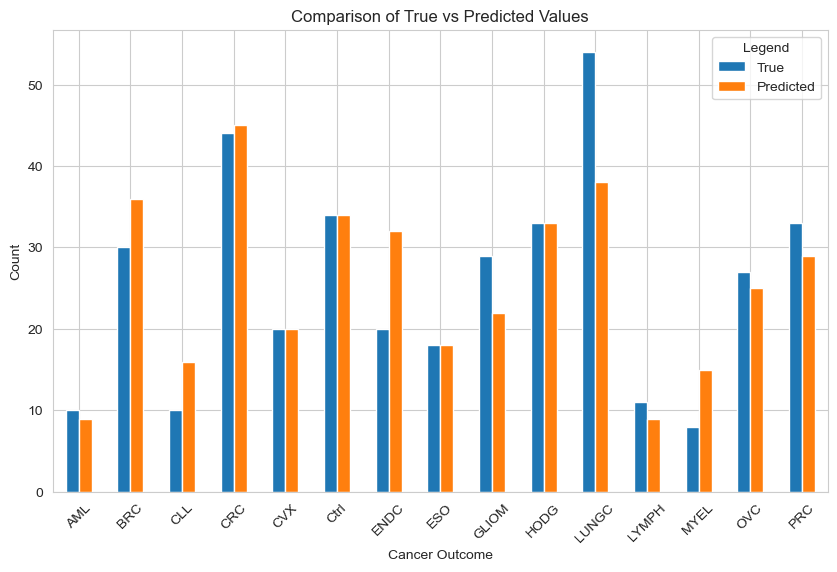

In [277]:
##Bar Plot of Predictions vs Actuals: compare the predicted and actual values to see how well the model performed.
####the bar plot helps in comparing counts of actual vs predicted outcomes
import numpy as np

# Create a DataFrame to hold the true and predicted values
results_df = pd.DataFrame({'True': y_test, 'Predicted': y_pred2})

# Count the occurrences of each class in actual and predicted values
count_true = results_df['True'].value_counts()
count_predicted = results_df['Predicted'].value_counts()

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({'True': count_true, 'Predicted': count_predicted}).fillna(0)

# Plotting
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of True vs Predicted Values')
plt.xlabel('Cancer Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Legend', labels=['True', 'Predicted'])
plt.savefig('Comparison of True vs Predicted Values.png', format='png', dpi=300)
plt.show()

In [278]:
# Get feature importances
rf2_importances = rf2.feature_importances_
et2_importances = et2.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Random Forest Importance': rf2_importances,
    'Extra Trees Importance': et2_importances
})

# Sort by Random Forest importance
importance_df_sorted = importance_df.sort_values(by='Random Forest Importance', ascending=False)

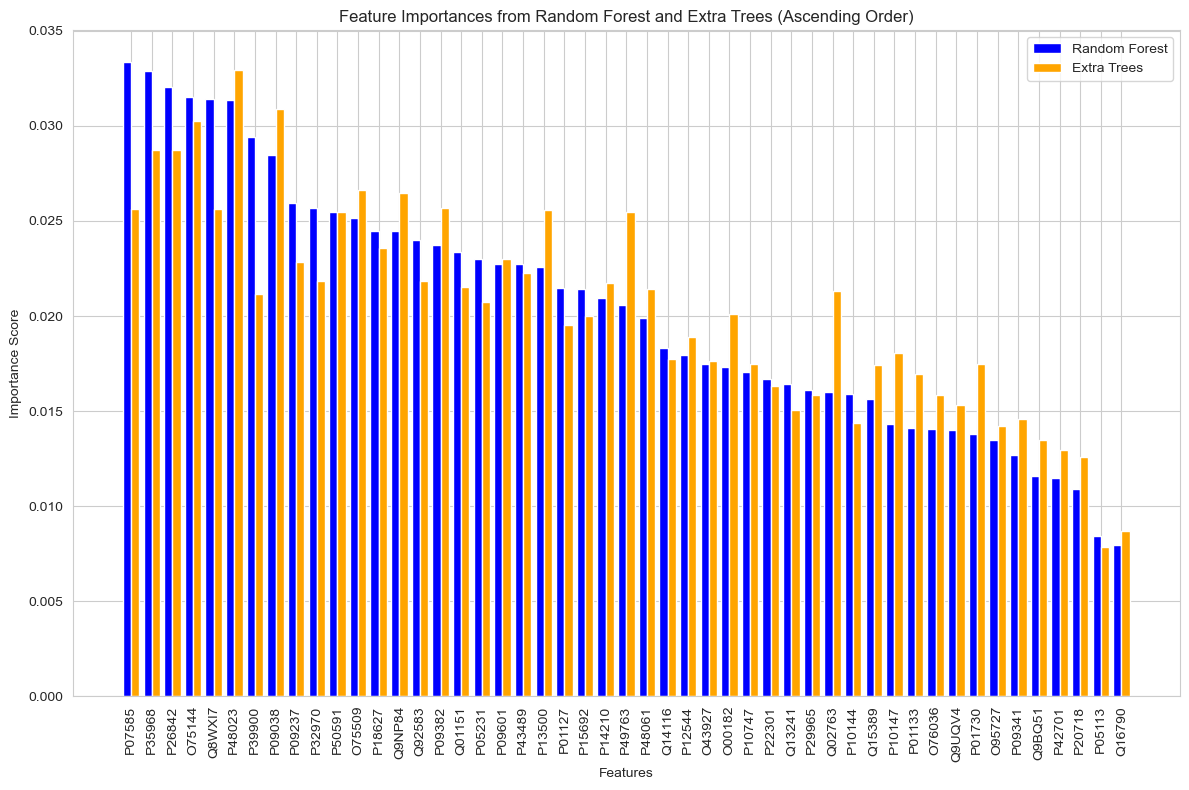

In [297]:
# Plot feature importances in ascending order
plt.figure(figsize=(12, 8))
x = np.arange(len(importance_df_sorted))

# Bar plots for Random Forest and Extra Trees
plt.bar(x - 0.2, importance_df_sorted['Random Forest Importance'], width=0.4, label='Random Forest', color='blue')
plt.bar(x + 0.2, importance_df_sorted['Extra Trees Importance'], width=0.4, label='Extra Trees', color='orange')

# Aesthetics
plt.xticks(x, importance_df_sorted['Feature'], rotation=90)
plt.title('Feature Importances from Random Forest and Extra Trees (Ascending Order)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.legend()
plt.tight_layout()
plt.savefig('Feature Importances from Random Forest and Extra Trees.png', format='png', dpi=300)
plt.show()

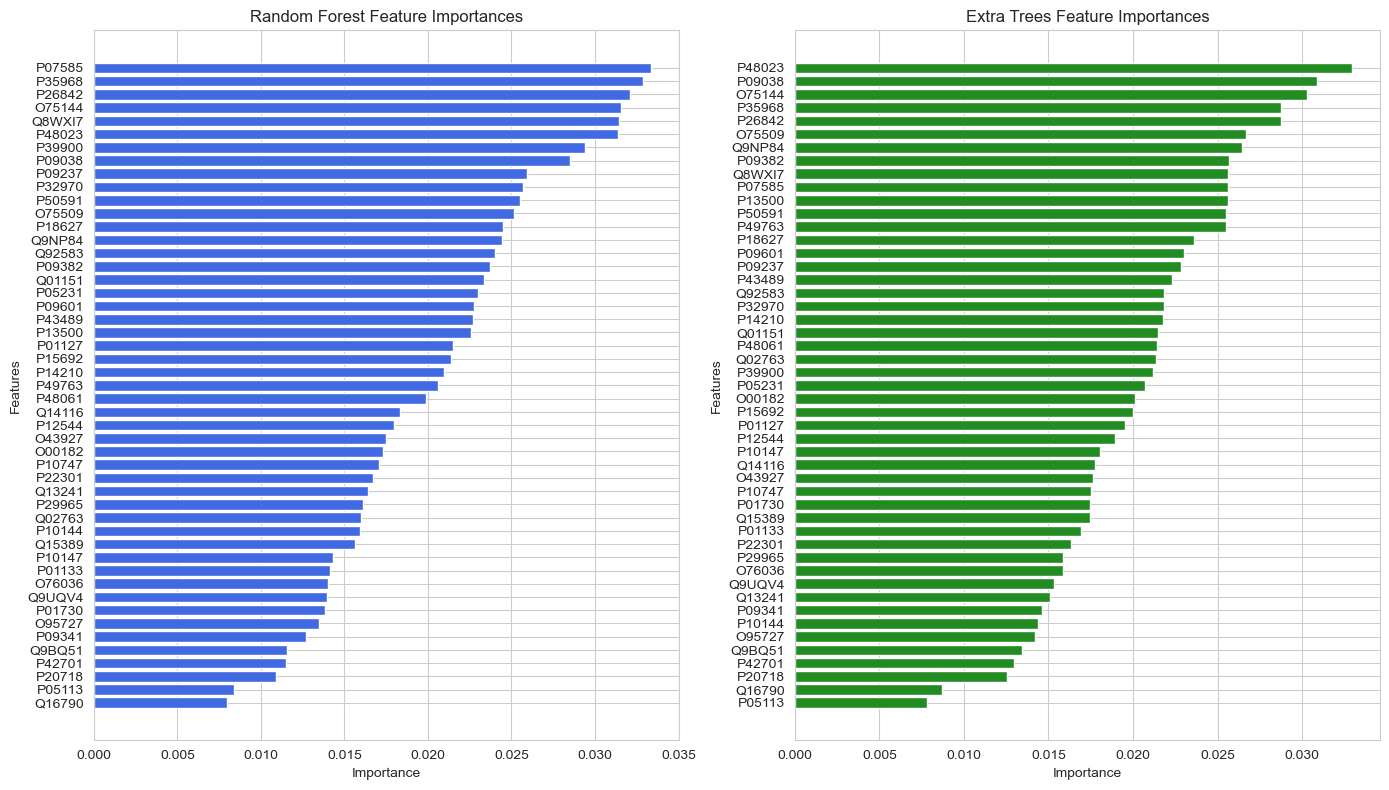

In [280]:

# Get feature importances
rf2_importances = rf2.feature_importances_
et2_importances = et2.feature_importances_

# Create DataFrames for importances
rf2_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf2_importances
}).sort_values(by='Importance', ascending=True)

et2_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': et2_importances
}).sort_values(by='Importance', ascending=True)

# Create a figure to display both importances side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Plot Random Forest importances
ax[0].barh(rf2_importance_df['Feature'], rf2_importance_df['Importance'], color='royalblue')
ax[0].set_title('Random Forest Feature Importances')
ax[0].set_xlabel('Importance')
ax[0].set_ylabel('Features')

# Plot Extra Trees importances
ax[1].barh(et2_importance_df['Feature'], et2_importance_df['Importance'], color='forestgreen')
ax[1].set_title('Extra Trees Feature Importances')
ax[1].set_xlabel('Importance')
ax[1].set_ylabel('Features')

# Adjust layout
plt.tight_layout()
plt.show()

In [293]:

##To apply hyperparameter tuning using cross-validation for your RandomForestClassifier, you can use GridSearchCV

from sklearn.model_selection import train_test_split, GridSearchCV


# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 500, 1000],  # Number of trees
    'max_depth': [None, 5, 10, 15],    # Tree depth
    'min_samples_split': [2, 5, 10],   # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum samples at a leaf node
}



In [294]:
# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = best_rf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Evaluate the model
print("Best Parameters:\n", best_params)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy: 0.6351706036745407
Best Parameters:
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Classification Report:
               precision    recall  f1-score   support

         AML       0.71      0.50      0.59        10
         BRC       0.46      0.40      0.43        30
         CLL       0.64      0.90      0.75        10
         CRC       0.51      0.57      0.54        44
         CVX       0.27      0.30      0.29        20
        Ctrl       1.00      1.00      1.00        34
        ENDC       0.36      0.25      0.29        20
         ESO       1.00      1.00      1.00        18
       GLIOM       0.75      0.52      0.61        29
        HODG       1.00      1.00      1.00        33
       LUNGC       0.53      0.72      0.61        54
       LYMPH       0.62      0.45      0.53        11
        MYEL       1.00      0.50      0.67         8
         OVC       0

In [295]:
#Random forests can also provide feature importance scores
best_rf.feature_importances_



array([0.01709445, 0.01636846, 0.02174757, 0.01474798, 0.02079164,
       0.01332601, 0.01594045, 0.01572485, 0.01817986, 0.02192344,
       0.01536746, 0.02872002, 0.03183636, 0.02715784, 0.01258026,
       0.01587312, 0.02413789, 0.03079233, 0.01699826, 0.01714732,
       0.0152956 , 0.0148275 , 0.02136422, 0.01768358, 0.01276542,
       0.02294824, 0.01036613, 0.02096047, 0.01460925, 0.01832462,
       0.02510805, 0.02783063, 0.0213744 , 0.01394418, 0.02209758,
       0.02819349, 0.03102402, 0.01187383, 0.03336218, 0.02214524,
       0.01062633, 0.02576626, 0.01815687, 0.02259097, 0.02960312,
       0.01932091, 0.02725653, 0.02725301, 0.0168718 ])

In [296]:
score_df = pd.DataFrame({'feature':X_train.columns,
                            'importance_score': best_rf.feature_importances_})

score_df.sort_values('importance_score',ascending=False)

,feature,importance_score
38,P48023,0.033362
12,P07585,0.031836
36,P35968,0.031024
17,P09038,0.030792
44,O75144,0.029603
11,P09237,0.028720
35,P50591,0.028193
31,O75509,0.027831
46,P32970,0.027257
47,Q8WXI7,0.027253
